## **Travel Salesman Problem by Genetic Algorithm**

This the implementation of Genetic Algorithm to solve the Traveling Salesman Problem (TSP), as in our project TravelSmart the key was to not only genertae a plan but an optimized plan.

*   The Locations are represented as coordinates.
*   The Genetic Algorithm (GA) evolves a population of paths over generations.
*   Selection, crossover, and mutation operations are applied, favoring paths with shorter total distances.
*   The algorithm explores different itineraries,
and over iterations, converges towards paths that represent efficient solutions to the TSP

The algorithm was provided with 7 different locations in pakistan namely: Nathia Gali, Kalash Valley, Kaghan Valley, Mahodand Lake, Green Top Kalam, Kawai Waterfall, Miranjani.

The result is the most optimized path and its corresponding total distance, providing an effective approach to solving itinerary optimization problems.



In [ ]:
import numpy as np, random, operator
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np
import pandas as pd

In [ ]:
# Function to calculate the distance between cities
def distance_between_places(places):

# Initializes an empty dictionary data to store the distances between places
    data = dict()

#enumerate function, which provides both the index and the value of each place, a1:longitude, b1:latitude
    for index, value in enumerate(places):
        a1 = places[index][0]
        b1 = places[index][1]

# Checks if there is a next place in the list .
        if index + 1 <= len(places)-1:
            a2 = places[index+1][0]
            b2 = places[index+1][1]

            adiff = a2 - a1
            bdiff = b2 - b1

            #Distance formula = ((x2 - x1)^2 + (y2 - y1)^2))*0.5
            dst = (adiff*adiff + bdiff*bdiff)** 0.5
            data['Distance from place '+ str(index+1) +' to place ' + str(index+2)] = dst

# Checks current place as last one
        elif index + 1 > len(places)-1:
            a2 = places[0][0]
            b2 = places[0][1]
            adiff = a2 - a1
            bdiff = b2 - b1

            #Distance formula = ((x2 - x1)^2 + (y2 - y1)^2))*0.5
            dst = (adiff*adiff + bdiff*bdiff)** 0.5

            data['Distance from place '+ str(index+1) + ' to place ' + str(index +2 -len(places))] = dst

    return data

In [ ]:
# Example list of places
placeList  = [[73.39222911181074,34.07001635937411],[71.75502048832747,35.71712899349611],[73.35015019497992,34.542072615609854],[72.65772831380825,35.70291721965972]
             ,[72.60536927198704,35.475533031042524],[73.44376337344023,34.634401233577776],[73.40732932449558,34.10498160833067]]
val = distance_between_places(placeList).values()

In [ ]:
# Calculate and print the distances between cities
print(val)

dict_values([2.3223763920373193, 1.9812108096455257, 1.3516686932369915, 0.23333460629219624, 1.1876057300542882, 0.5306718190362949, 0.03808654693880367])


In [ ]:
# Function to calculate the total distance of a path
def total_distance(places):
    total = sum(distance_between_places(places).values())
    return total

# Example of calculating the total distance for the given placeList
total_distance(placeList)

7.644954597241419

In [ ]:

# Function to generate a random path
def generatePath(places):
    path = random.sample(places, len(places))
    return path

list= generatePath(placeList)
print(list)

[[72.60536927198704, 35.475533031042524], [71.75502048832747, 35.71712899349611], [72.65772831380825, 35.70291721965972], [73.40732932449558, 34.10498160833067], [73.39222911181074, 34.07001635937411], [73.44376337344023, 34.634401233577776], [73.35015019497992, 34.542072615609854]]


In [ ]:
# Names for the places
import numpy as np
place_names = ['Nathia Gali', 'Kalash Valley', 'Kaghan Valley', 'Mahodand Lake','Green Top Kalam','Kawai Waterfall','Miranjani']
# Function to plot a path
def plot_pop(places):
    plt.figure(figsize=(20,10))
#Extracts the x-coordinates of each place from the places list.
    x = [i[0] for i in places]
    y = [i[1] for i in places]
#Defines the x-coordinates of the initial and final points of the path.
    a1=[x[0],x[-1]]
    b1=[y[0],y[-1]]
    plt.plot(x, y, 'b', a1, b1, 'b')
    plt.scatter (x, y)
    j =[73.39222911181074, 71.75502048832747, 73.35015019497992, 72.65772831380825,72.60536927198704,73.44376337344023,73.40732932449558]
    k = [34.07001635937411, 35.71712899349611, 34.542072615609854, 35.70291721965972,35.475533031042524,34.634401233577776,34.10498160833067]

# Annotate the places on the plot
    for i, txt in enumerate(place_names):
        plt.annotate(txt, (j[i], k[i]),horizontalalignment='center',
            #verticalalignment='bottom',
                    )
    plt.show()
    return

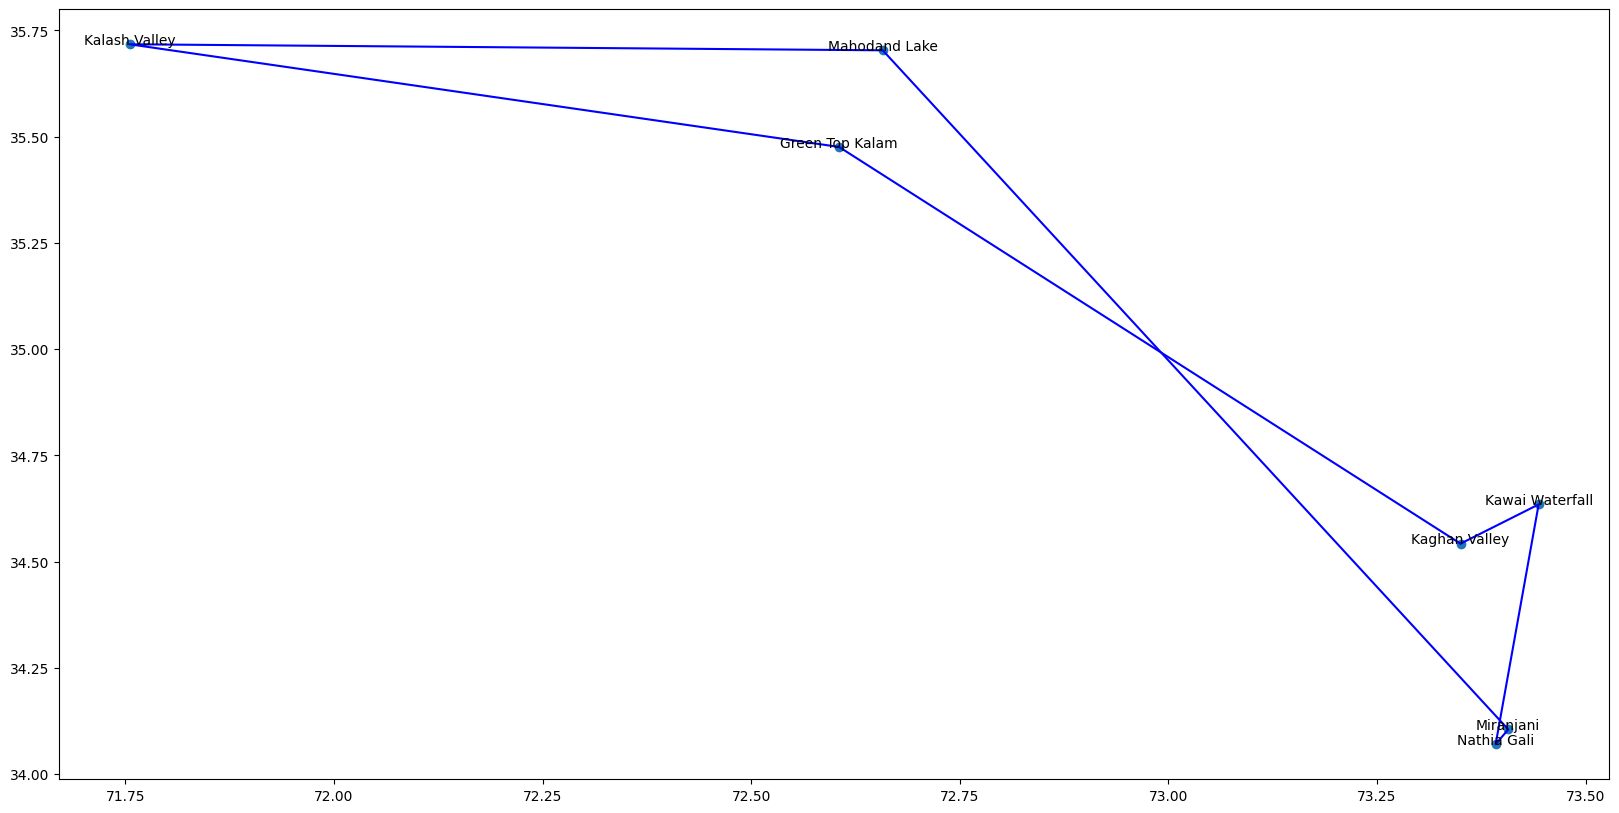

In [ ]:
# Example of plotting the generated path
plot_pop(list)

In [ ]:
# Function to generate an initial population of paths
def initialPopulation(places, populationSize):
    population = [generatePath(places) for i in range(0, populationSize)]
    return population

# Example of generating an initial population
population = initialPopulation(placeList,10)

In [ ]:
# Print the initial population
for idx, pop_plot in enumerate (population):
    print('Initial Population '+ str(idx),pop_plot)

Initial Population 0 [[72.65772831380825, 35.70291721965972], [73.35015019497992, 34.542072615609854], [72.60536927198704, 35.475533031042524], [71.75502048832747, 35.71712899349611], [73.40732932449558, 34.10498160833067], [73.44376337344023, 34.634401233577776], [73.39222911181074, 34.07001635937411]]
Initial Population 1 [[73.44376337344023, 34.634401233577776], [71.75502048832747, 35.71712899349611], [72.65772831380825, 35.70291721965972], [73.35015019497992, 34.542072615609854], [72.60536927198704, 35.475533031042524], [73.40732932449558, 34.10498160833067], [73.39222911181074, 34.07001635937411]]
Initial Population 2 [[73.40732932449558, 34.10498160833067], [73.44376337344023, 34.634401233577776], [72.65772831380825, 35.70291721965972], [73.35015019497992, 34.542072615609854], [71.75502048832747, 35.71712899349611], [72.60536927198704, 35.475533031042524], [73.39222911181074, 34.07001635937411]]
Initial Population 3 [[73.35015019497992, 34.542072615609854], [72.65772831380825, 35

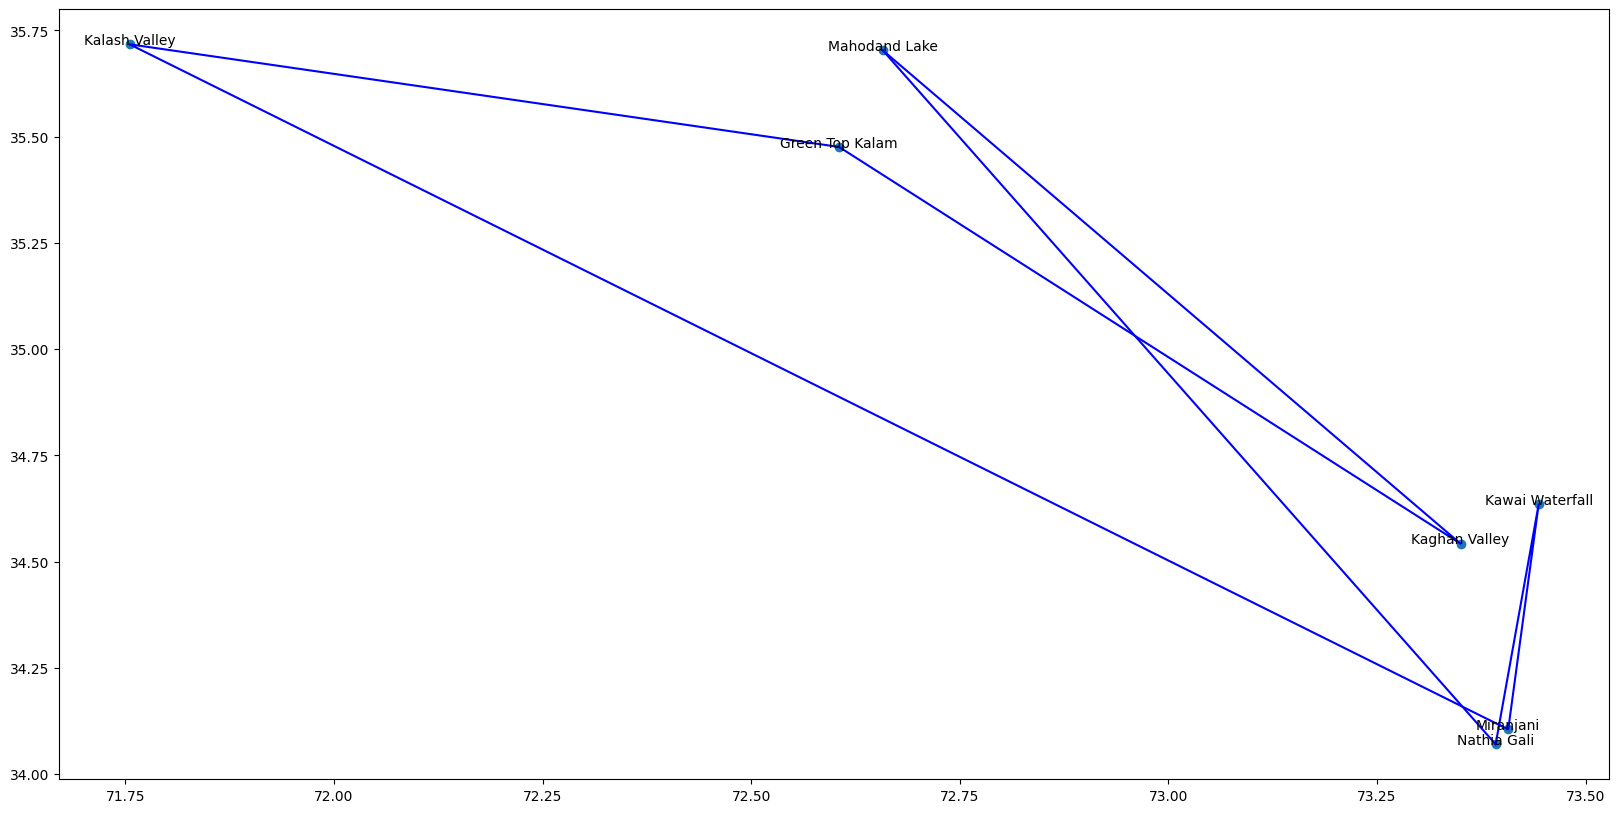

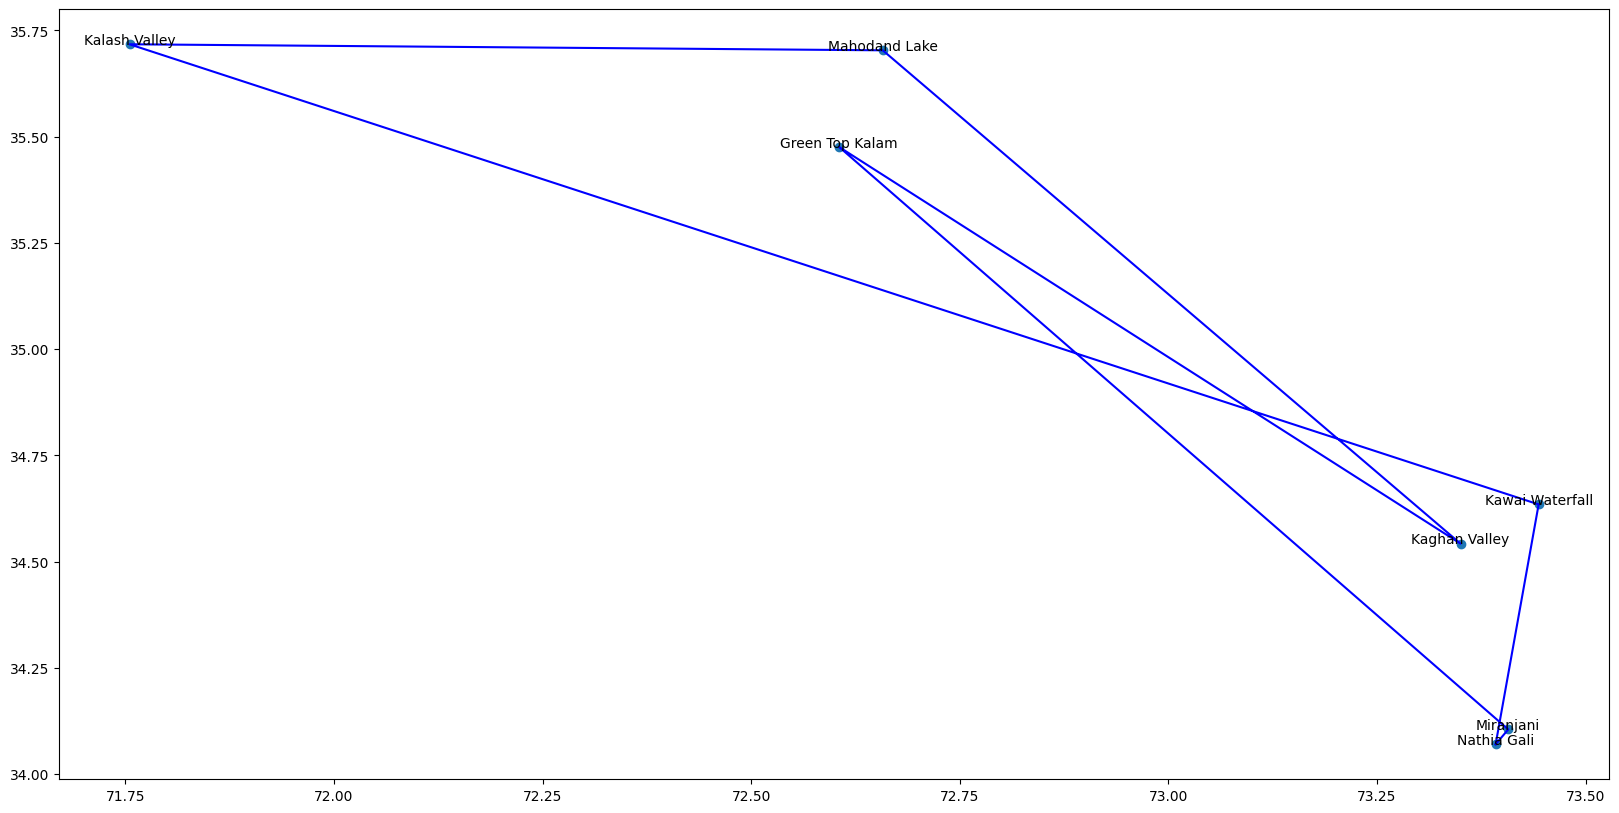

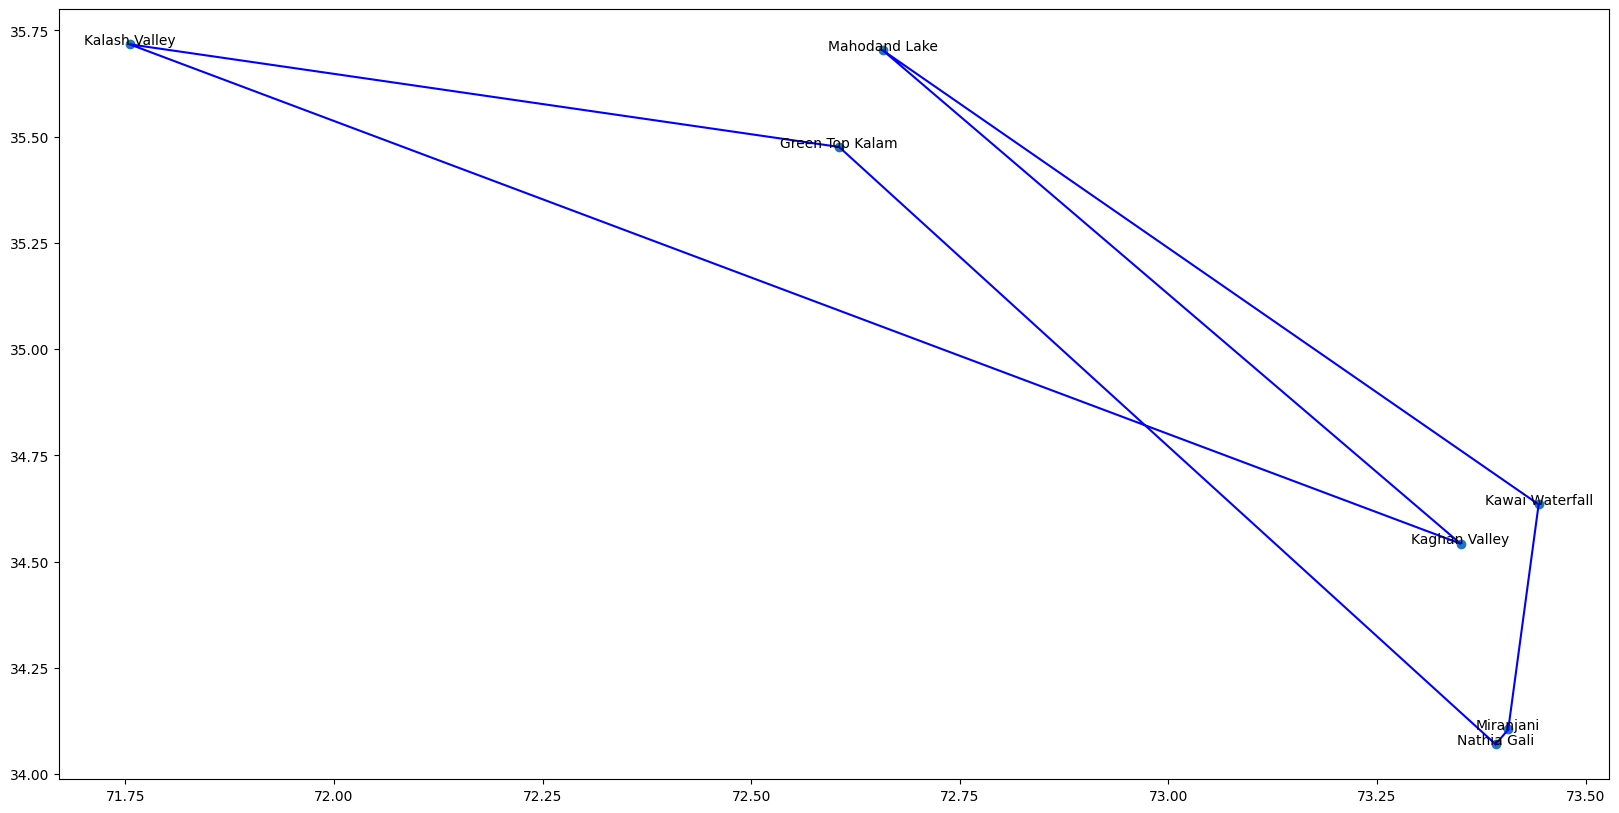

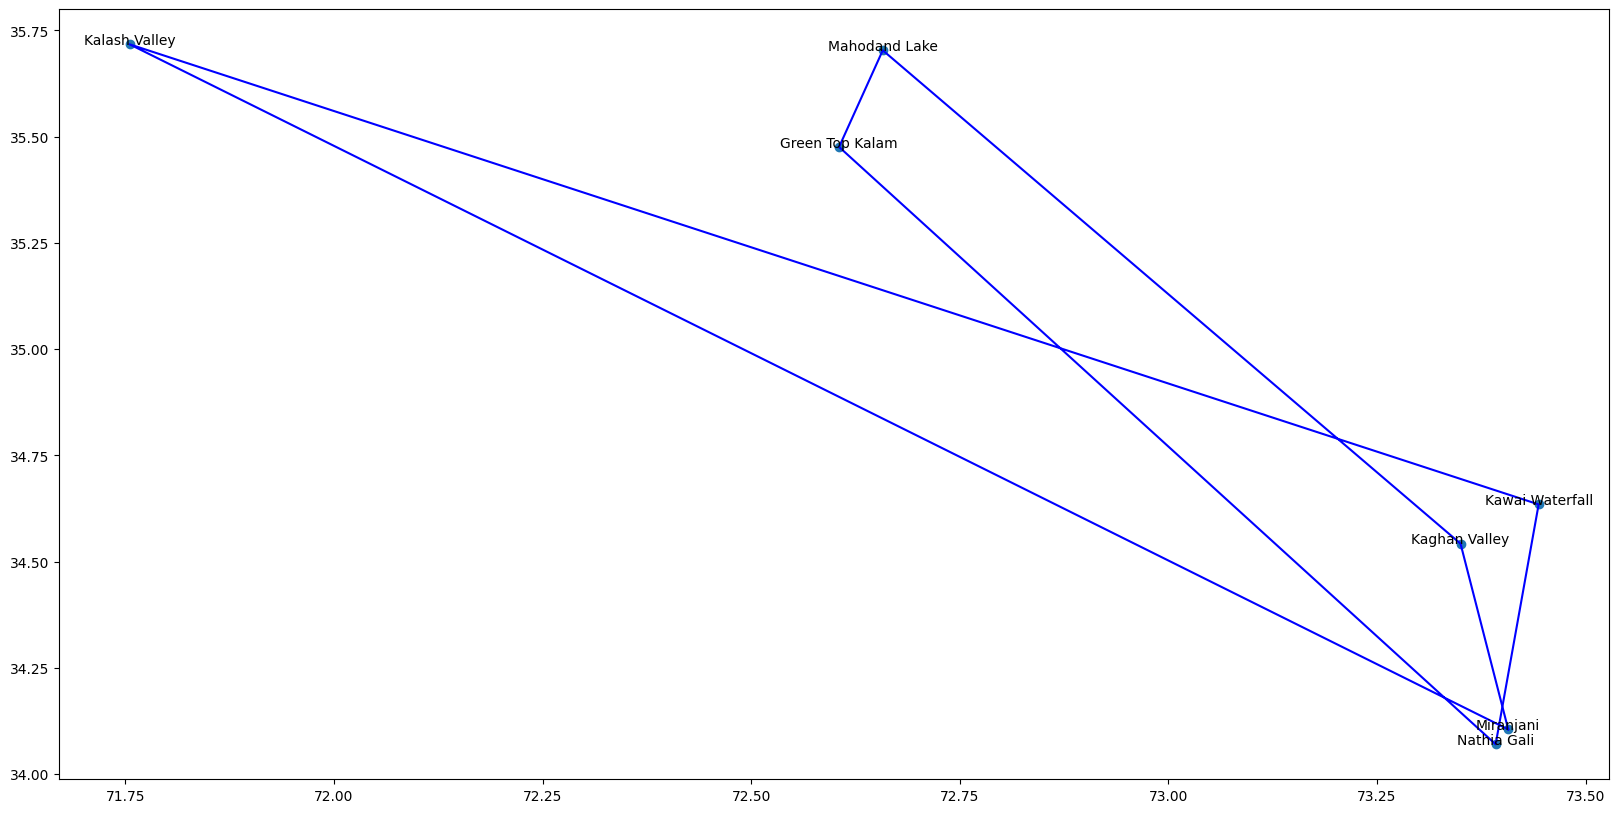

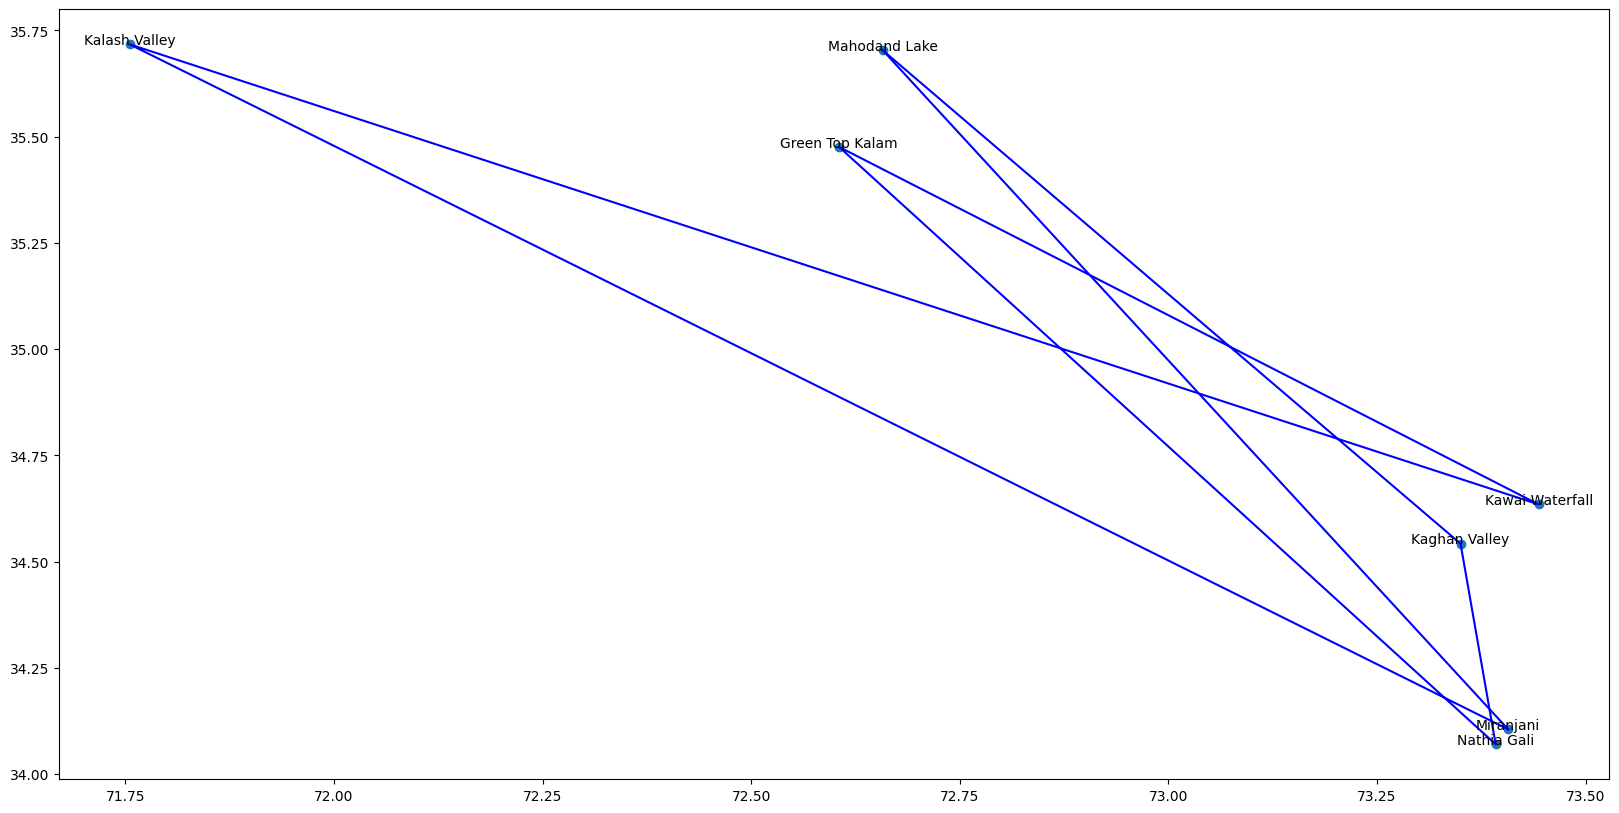

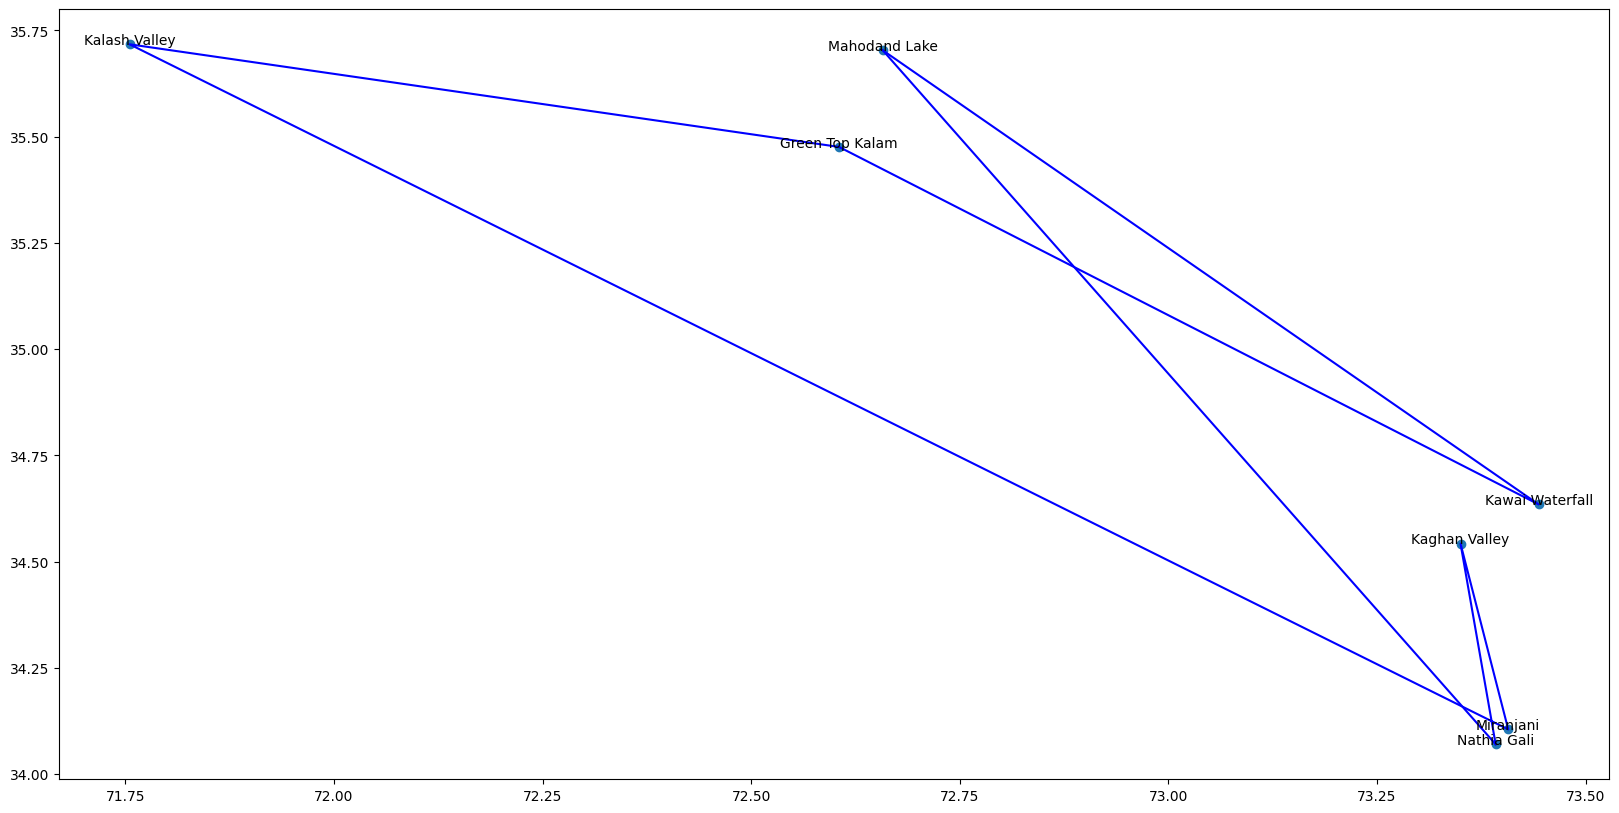

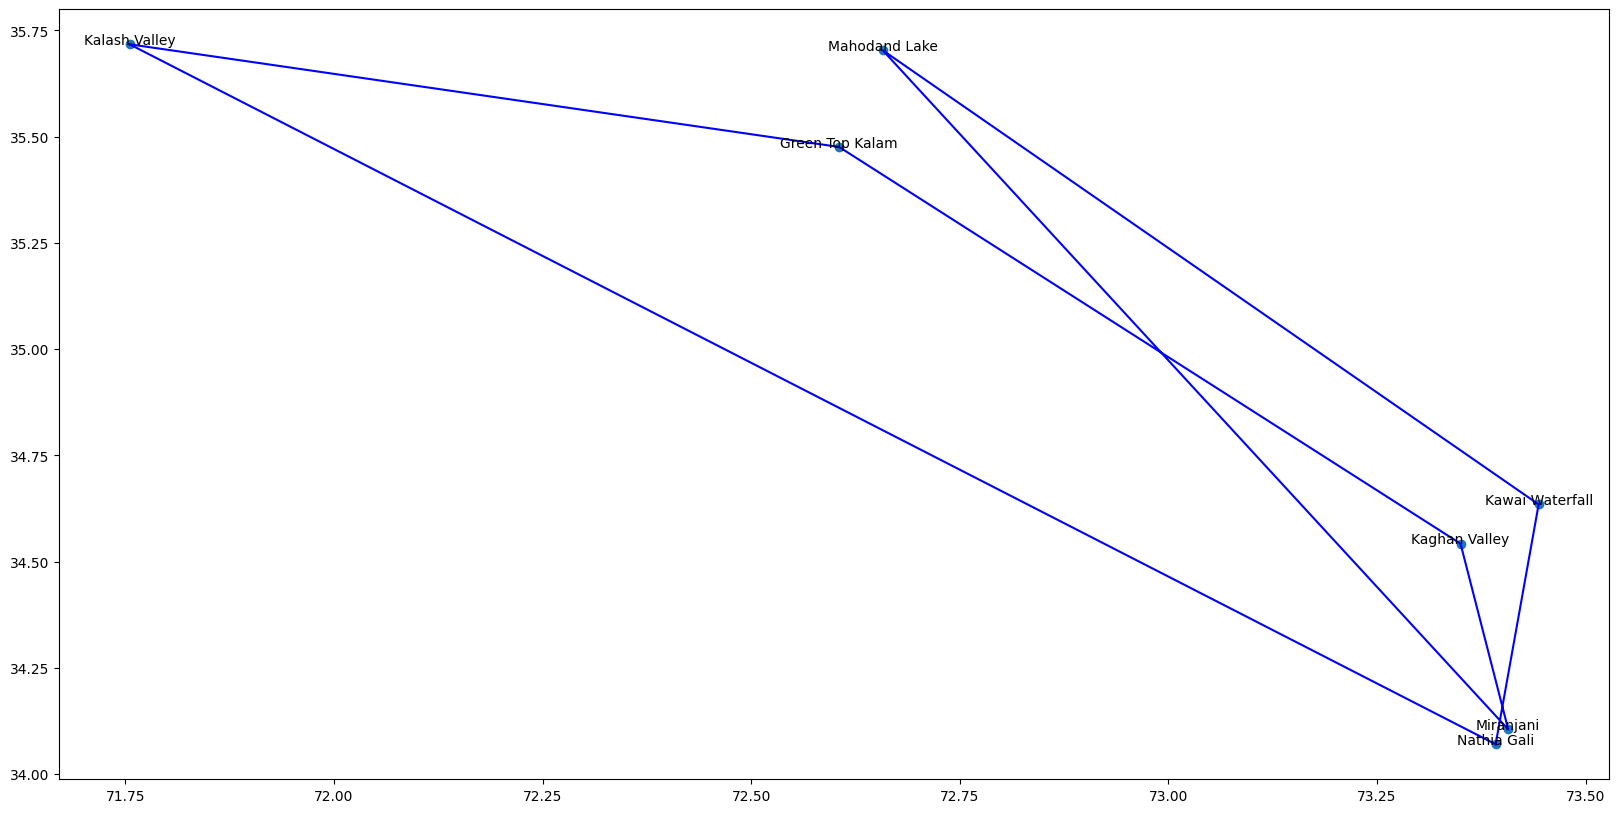

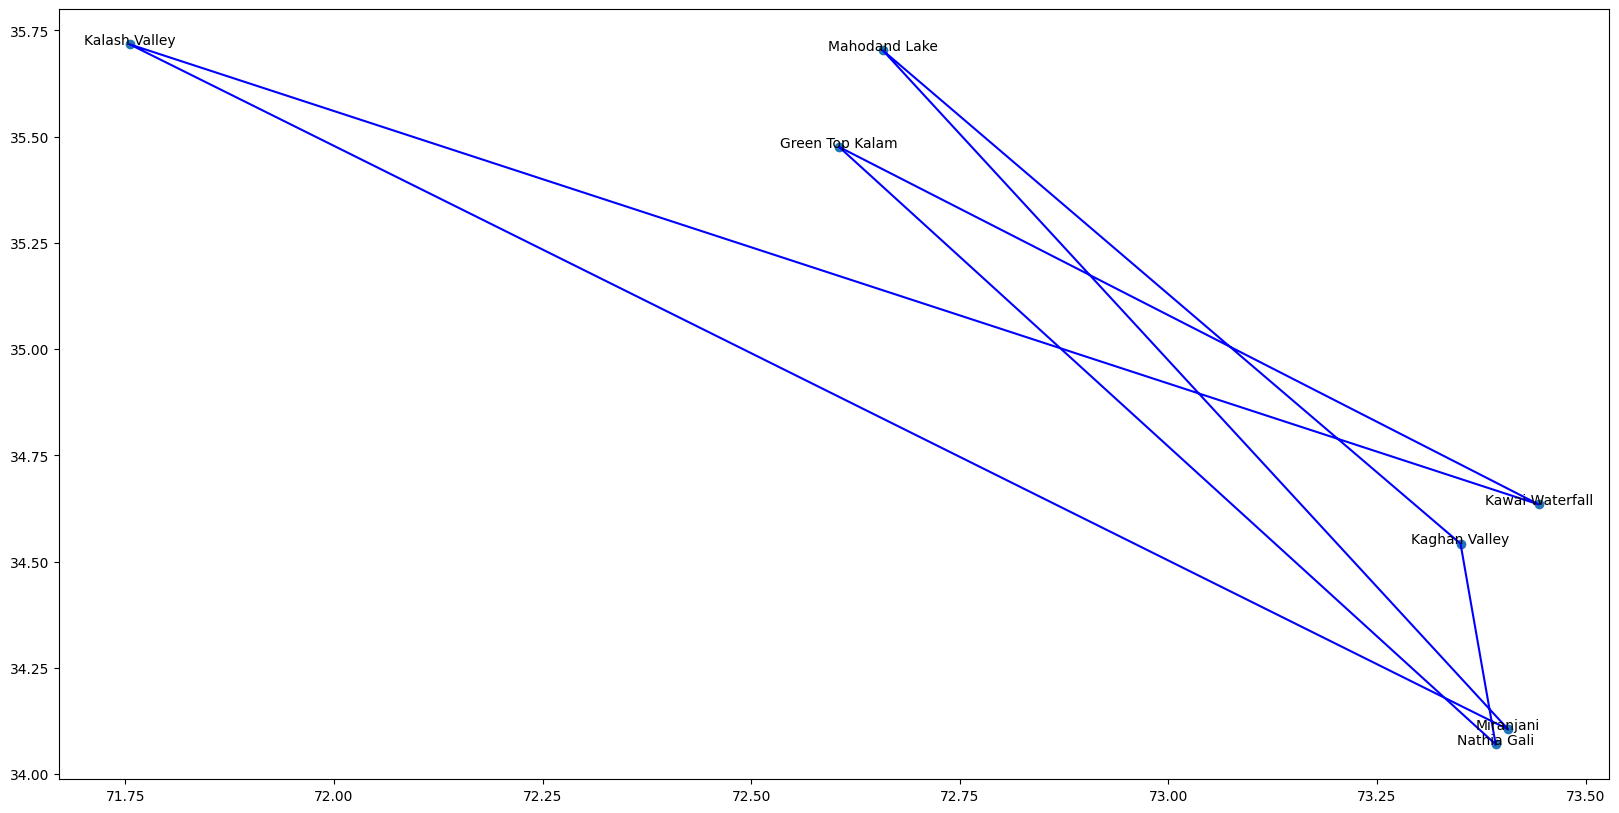

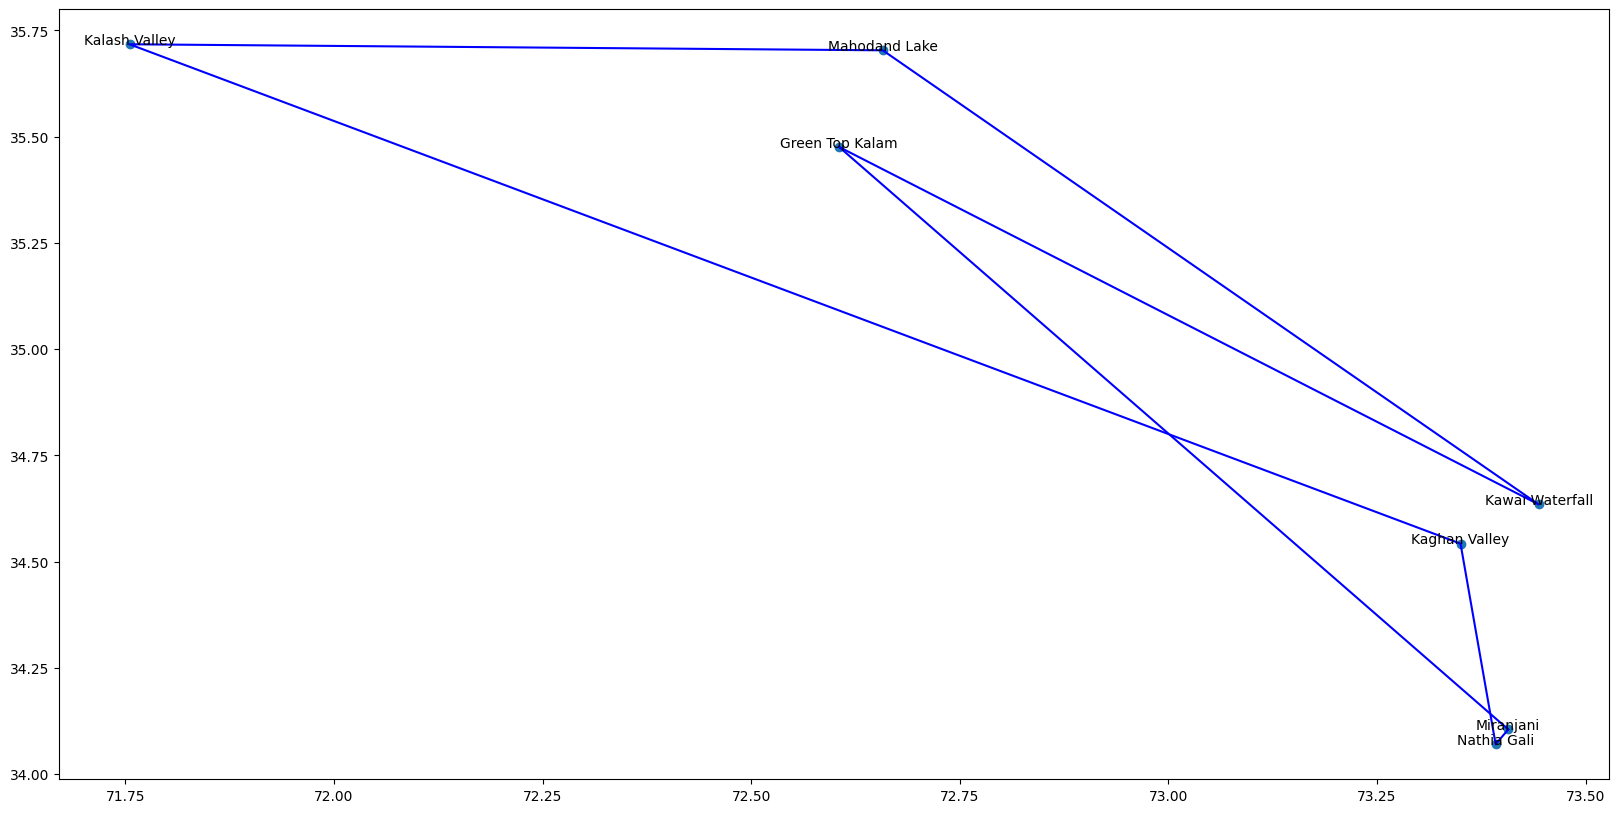

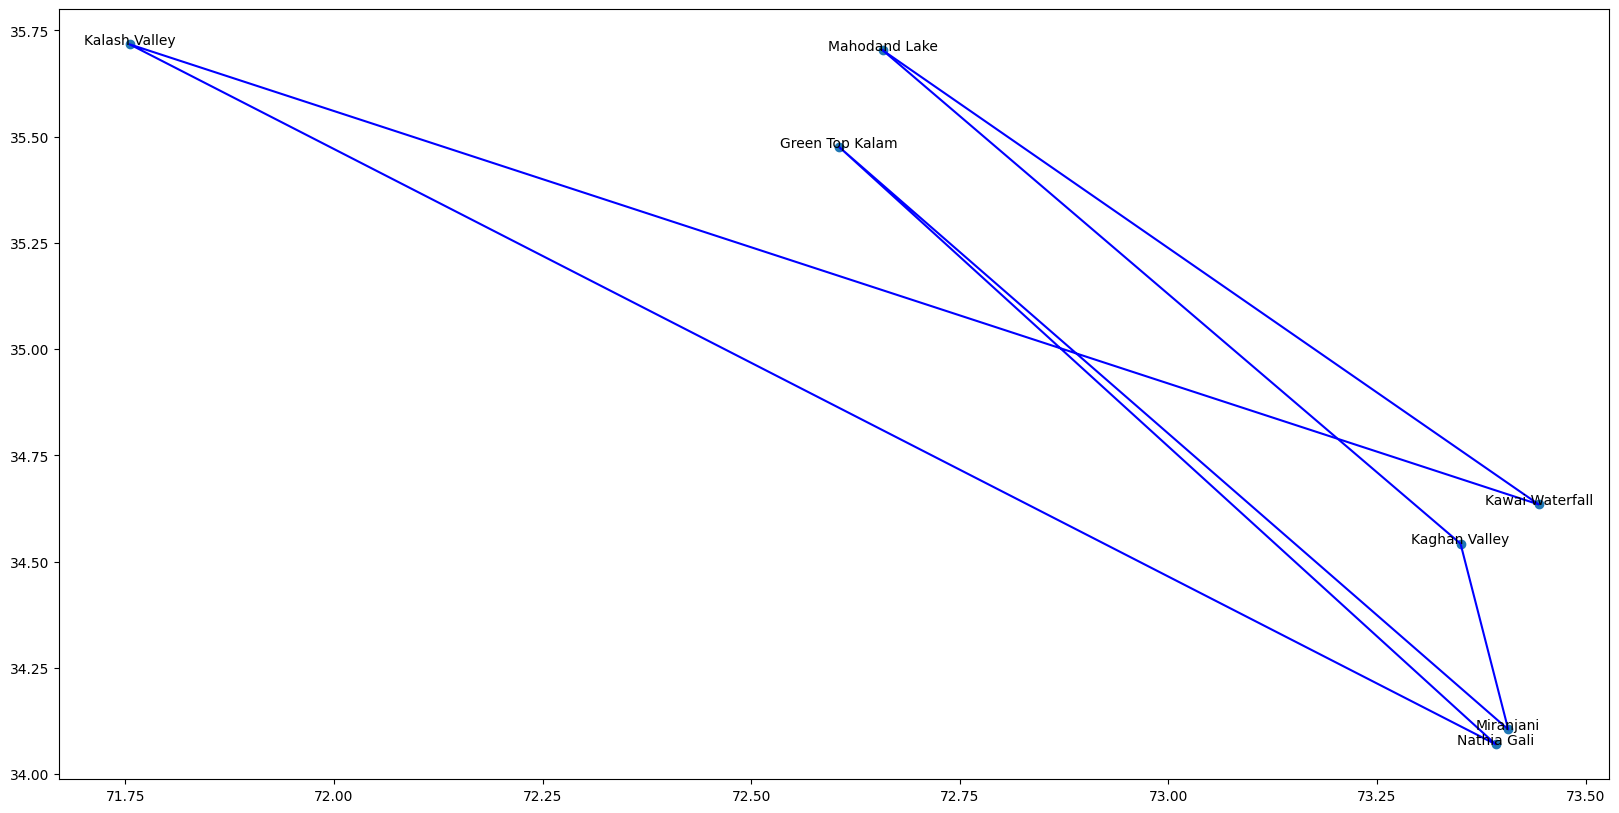

In [ ]:
# Plot the initial population
for pop_plot in population:
    plot_pop(pop_plot)

In [ ]:
# Function to calculate the fitness of a path
def path_fitness(places):
    total_dis = total_distance(places)
    fitness= 0.0
    if fitness == 0:
        fitness = 1 / float(total_dis)
    return fitness
# Example of calculating the fitness of the given placeList
path_fitness(placeList)

0.13080522418809876

In [ ]:
# Function to rank paths based on their fitness
def rankPathes(population):
    fitnessResults = {}
    for i in range(len(population)):
        fitnessResults[i] = path_fitness(population[i])

    return sorted(fitnessResults.items(), key = operator.itemgetter(1), reverse = True)
# Example of ranking paths in the population
rankPathes(population)

[(8, 0.13336746253491594),
 (1, 0.13076257624546164),
 (2, 0.12948477165797445),
 (5, 0.11888023578829801),
 (6, 0.1176524357661934),
 (3, 0.11740040614208676),
 (0, 0.11592545630907278),
 (9, 0.09393108249187658),
 (7, 0.0934271175537348),
 (4, 0.09342711755373478)]

In [ ]:
# Function to perform selection on the population
def perform_selection(pop, eliteSize):
    #output = rankPathes(population)
    #Converts the population (pop) into a DataFrame using the pandas library
    df = pd.DataFrame(np.array(pop), columns=["Index","Fitness"])
#A cumulative sum is a sequence of partial sums of a given sequence
    df['cumulative_sum'] = df.Fitness.cumsum()
#Cumulative percentage is another way of expressing frequency distribution.
#It calculates the percentage of the cumulative frequency within each interval, much as relative frequency distribution calculates the percentage of frequency.
    df['cum_percentage'] = 100*df.cumulative_sum/df.Fitness.sum()
    selected_values = [pop[i][0] for i in range(eliteSize)]

    for i in range(len(pop) - eliteSize):
#Generates a random number between 0 and 100 to act as a "spin" of the roulette wheel.
        pick = 100*random.random()
        for i in range(0, len(pop)):
            if pick <= df.iat[i,3]:
                selected_values.append(pop[i][0])
                break
#Returns a list of selected individuals for the next generation.
    return selected_values

In [ ]:
# Example of performing selection on the population
out11 = rankPathes(population)
selected_values = perform_selection(out11,5)
print(selected_values)

[8, 1, 2, 5, 6, 7, 2, 1, 7, 8]


In [ ]:
# Function to create a mating pool from the selected values
def do_mating_pool(population, selected_values):
    matingpool = [population[selected_values[i]] for i in range(len(selected_values))]
    return matingpool
# Example of creating a mating pool
mp = do_mating_pool(population, selected_values)

In [ ]:
# Function to perform breeding between parents
def do_breed(first_parent, second_parent):
#Randomly selects a position in the genetic information of the first parent.
    generation_1= int(random.random() * len(first_parent))
#Randomly selects a position in the genetic information of the second parent.
    generation_2 = int(random.random() * len(second_parent))

    first_generation = min(generation_1, generation_2)
    last_generation = max(generation_1, generation_2)
#Selects genetic information from the second parent that is not already included from the first parent.
    tot_parent1 = [first_parent[i] for i in range(first_generation, last_generation)]
    tot_parent2 = [i for i in second_parent if i not in tot_parent1]
#tot is a variable that represents the genetic information of the offspring resulting from the breeding process between two parents.
    tot = tot_parent1 + tot_parent2
    return tot

In [ ]:
# Example of performing breeding between parents
def do_breed_population(my_mating_pool, eliteSize):
#Determines the number of offspring to generate.
    ln = len(my_mating_pool) - eliteSize
    pl = random.sample(my_mating_pool, len(my_mating_pool))
    tot1 = [my_mating_pool[i] for i in range(eliteSize)]
    tot2 = [do_breed(pl[i], pl[len(my_mating_pool)-i-1]) for i in range(ln)]
    tot = tot1+tot2
    return tot
do_breed_population(mp,2)

[[[72.60536927198704, 35.475533031042524],
  [73.44376337344023, 34.634401233577776],
  [72.65772831380825, 35.70291721965972],
  [71.75502048832747, 35.71712899349611],
  [73.35015019497992, 34.542072615609854],
  [73.39222911181074, 34.07001635937411],
  [73.40732932449558, 34.10498160833067]],
 [[73.44376337344023, 34.634401233577776],
  [71.75502048832747, 35.71712899349611],
  [72.65772831380825, 35.70291721965972],
  [73.35015019497992, 34.542072615609854],
  [72.60536927198704, 35.475533031042524],
  [73.40732932449558, 34.10498160833067],
  [73.39222911181074, 34.07001635937411]],
 [[72.65772831380825, 35.70291721965972],
  [72.60536927198704, 35.475533031042524],
  [73.44376337344023, 34.634401233577776],
  [71.75502048832747, 35.71712899349611],
  [73.35015019497992, 34.542072615609854],
  [73.39222911181074, 34.07001635937411],
  [73.40732932449558, 34.10498160833067]],
 [[72.60536927198704, 35.475533031042524],
  [73.44376337344023, 34.634401233577776],
  [71.75502048832747

In [ ]:
# Function to perform mutation on an individual path
def do_mutation(indiv, mutation_rate):
    for exchanged in range(len(indiv)):
        if(random.random() < mutation_rate):
            exchanged_with = int(random.random() * len(indiv))

            place1 = indiv[exchanged]
            place2 = indiv[exchanged_with]

            indiv[exchanged] = place2
            indiv[exchanged_with] = place1
    return indiv

In [ ]:
# Function to perform mutation on the entire population
def do_mutation_pop(population, mutation_rate):
    mutationed_population = [do_mutation(population[i], mutation_rate) for i in range(len(population))]
    return mutationed_population
# Example of applying mutation to the population
do_mutation_pop(population, 0.01)

[[[72.65772831380825, 35.70291721965972],
  [73.35015019497992, 34.542072615609854],
  [72.60536927198704, 35.475533031042524],
  [71.75502048832747, 35.71712899349611],
  [73.40732932449558, 34.10498160833067],
  [73.44376337344023, 34.634401233577776],
  [73.39222911181074, 34.07001635937411]],
 [[73.44376337344023, 34.634401233577776],
  [71.75502048832747, 35.71712899349611],
  [72.65772831380825, 35.70291721965972],
  [73.35015019497992, 34.542072615609854],
  [72.60536927198704, 35.475533031042524],
  [73.40732932449558, 34.10498160833067],
  [73.39222911181074, 34.07001635937411]],
 [[73.40732932449558, 34.10498160833067],
  [73.44376337344023, 34.634401233577776],
  [72.65772831380825, 35.70291721965972],
  [73.35015019497992, 34.542072615609854],
  [71.75502048832747, 35.71712899349611],
  [72.60536927198704, 35.475533031042524],
  [73.39222911181074, 34.07001635937411]],
 [[73.35015019497992, 34.542072615609854],
  [72.65772831380825, 35.70291721965972],
  [72.60536927198704,

In [ ]:
# Function to get the next generation
def get_following_gen(existing_gen, eliteSize, mutation_rate):
    pop = rankPathes(existing_gen)

    selected_values = perform_selection(pop, eliteSize)

    my_mating_pool = do_mating_pool(existing_gen, selected_values)
    tot = do_breed_population(my_mating_pool, eliteSize)
    following_gen = do_mutation(tot, mutation_rate)
    #print(following_gen)
    return following_gen
# Example of obtaining the next generation
get_following_gen(population, 5, 0.01)

[[[72.60536927198704, 35.475533031042524],
  [73.44376337344023, 34.634401233577776],
  [72.65772831380825, 35.70291721965972],
  [71.75502048832747, 35.71712899349611],
  [73.35015019497992, 34.542072615609854],
  [73.39222911181074, 34.07001635937411],
  [73.40732932449558, 34.10498160833067]],
 [[73.44376337344023, 34.634401233577776],
  [71.75502048832747, 35.71712899349611],
  [72.65772831380825, 35.70291721965972],
  [73.35015019497992, 34.542072615609854],
  [72.60536927198704, 35.475533031042524],
  [73.40732932449558, 34.10498160833067],
  [73.39222911181074, 34.07001635937411]],
 [[73.40732932449558, 34.10498160833067],
  [73.44376337344023, 34.634401233577776],
  [72.65772831380825, 35.70291721965972],
  [73.35015019497992, 34.542072615609854],
  [71.75502048832747, 35.71712899349611],
  [72.60536927198704, 35.475533031042524],
  [73.39222911181074, 34.07001635937411]],
 [[72.65772831380825, 35.70291721965972],
  [73.44376337344023, 34.634401233577776],
  [72.60536927198704,

In [ ]:
#if result_lst represents the order in which places are visited
def get_names(result_lst, places, name_lst):
    names = []
    for index,value in enumerate(result_lst):
        for i,v in enumerate(places):
            if value == v:
                names.append(name_lst[i])
    return names

Incipient distance: 5.334483252206446
Eventual distance: 5.256521963698501
[(0, 'Kaghan Valley'), (1, 'Kawai Waterfall'), (2, 'Green Top Kalam'), (3, 'Mahodand Lake'), (4, 'Kalash Valley'), (5, 'Nathia Gali'), (6, 'Miranjani')]


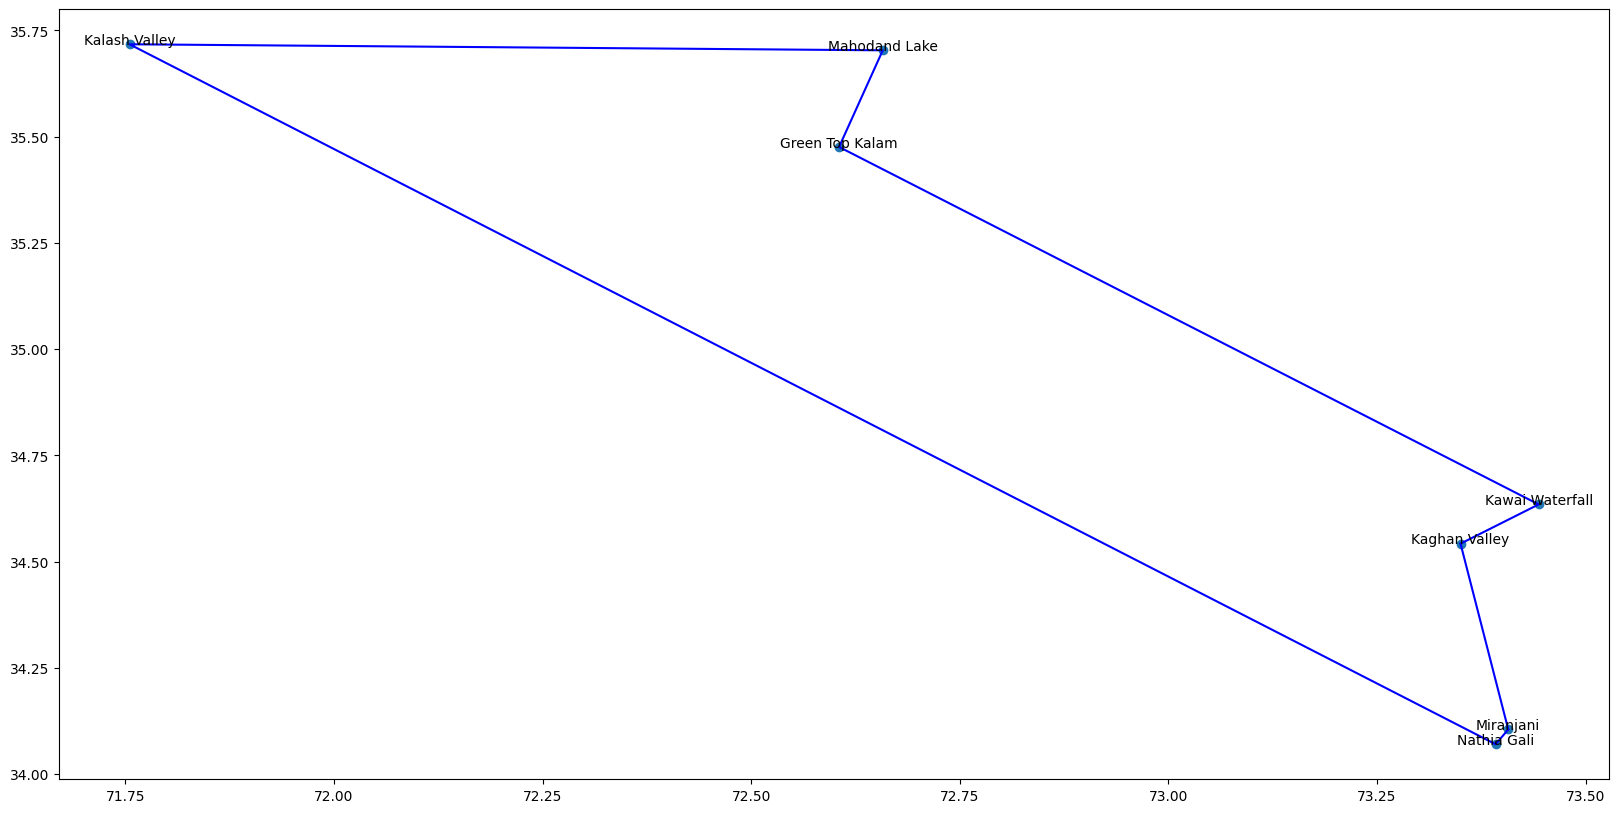

In [ ]:
# Genetic Algorithm main function
def GA(place_names,places, population_size, eliteSize, mutation_rate, generations):
    population = initialPopulation(places,population_size)
    #print(population_)
#  the best route in the initial population.
    print("Incipient distance: " + str(1 / rankPathes(population)[0][1]))
    for i in range(generations):
        population = get_following_gen(population, eliteSize, mutation_rate)
        #print(population)

    print("Eventual distance: " + str(1 / rankPathes(population)[0][1]))
    optimal_route_id = rankPathes(population)[0][0]
    optimal_route = population[optimal_route_id]
    ordered_places = get_names(optimal_route,places,place_names)
    print([(indx,val) for indx,val in enumerate(ordered_places)])
    plot_pop(optimal_route)
    return optimal_route
# Example of running the Genetic Algorithm
#Elite the number of top individuals to be preserved from one generation to the next.
result_lst = GA(place_names,placeList, population_size=100,
                 eliteSize=5, mutation_rate=0.01,
                 generations=500)

In [ ]:
print(result_lst)

[[73.35015019497992, 34.542072615609854], [73.40732932449558, 34.10498160833067], [73.39222911181074, 34.07001635937411], [71.75502048832747, 35.71712899349611], [72.65772831380825, 35.70291721965972], [72.60536927198704, 35.475533031042524], [73.44376337344023, 34.634401233577776]]


Best Solution: [[72.60536927198704, 35.475533031042524], [73.44376337344023, 34.634401233577776], [72.65772831380825, 35.70291721965972], [71.75502048832747, 35.71712899349611], [73.35015019497992, 34.542072615609854], [73.39222911181074, 34.07001635937411], [73.40732932449558, 34.10498160833067]]
Total Distance of Best Solution: 7.49808072368624
